# Abalone Case Study

In [15]:
##importing the all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
##DATA COLLECTION
#loading the dataset to the pandas DataFrame
data=pd.read_csv("abalone.csv")

In [3]:
##number of rows and columns in the dataframe:-
data.shape

(4177, 9)

In [4]:
##first 5 rows of the dataset
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [64]:
#checking the missing values:-
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [5]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [6]:
##statistical measures of the dataset:-
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

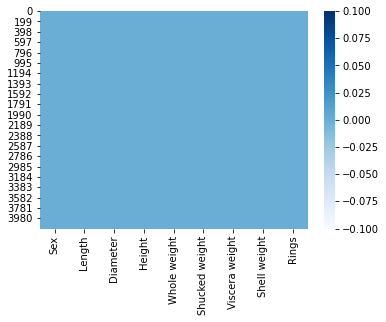

In [7]:
sns.heatmap(data.isnull(),cmap='Blues')

In [9]:
#Correlation:-
correlation=data.corr()

<AxesSubplot:>

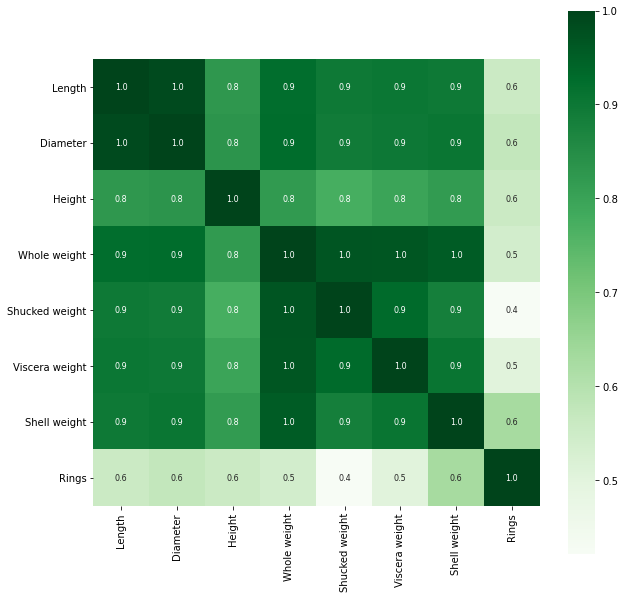

In [13]:
##constructing the heatmap to understand the correlation between the columns:-
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap='Greens')

In [14]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [18]:
#THREE category of SEX: M=2,F=0,I=1
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])

In [19]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


DISTRIBUTION PLOTS:-

<Figure size 432x288 with 0 Axes>

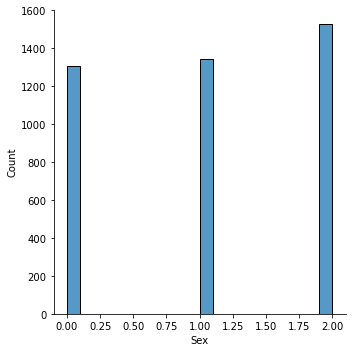

<Figure size 432x288 with 0 Axes>

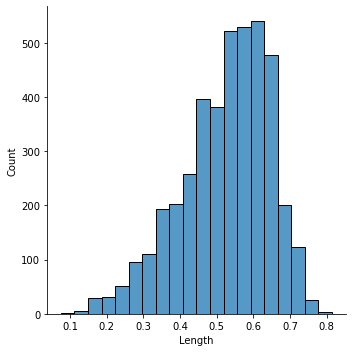

<Figure size 432x288 with 0 Axes>

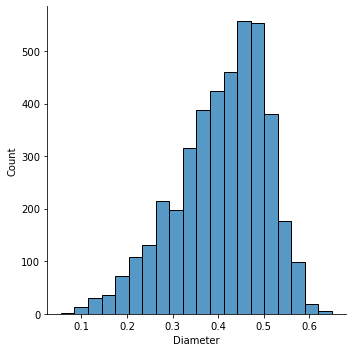

<Figure size 432x288 with 0 Axes>

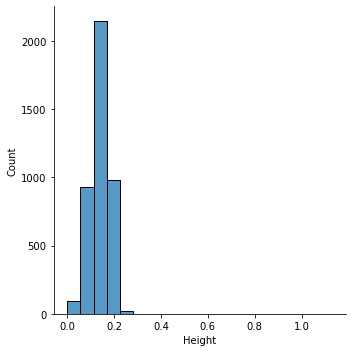

<Figure size 432x288 with 0 Axes>

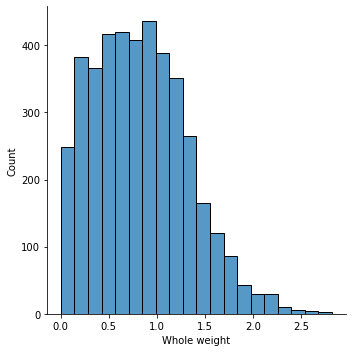

<Figure size 432x288 with 0 Axes>

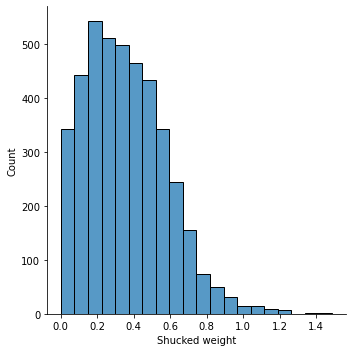

<Figure size 432x288 with 0 Axes>

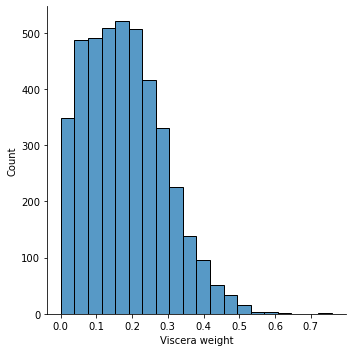

<Figure size 432x288 with 0 Axes>

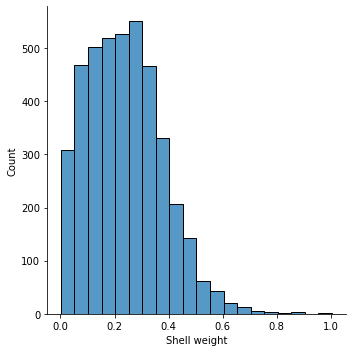

<Figure size 432x288 with 0 Axes>

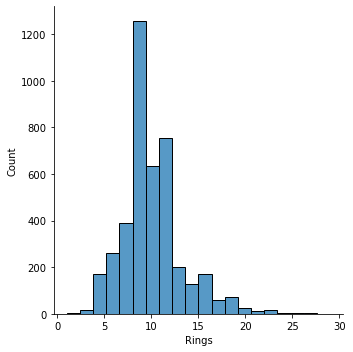

In [20]:
for i in data.columns:
    plt.figure()
    sns.displot(data[i],bins=20)

In [21]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

BOX PLOTS TO SEE OUTLIERS

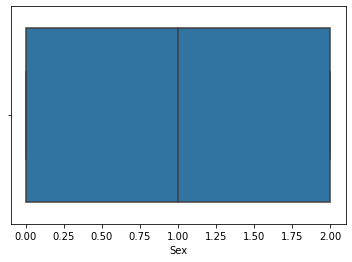

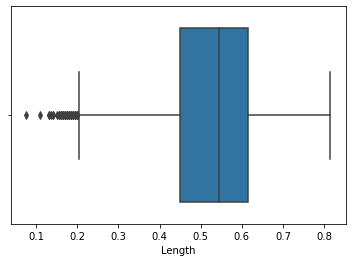

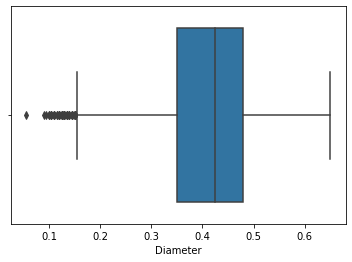

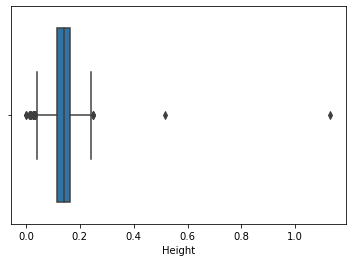

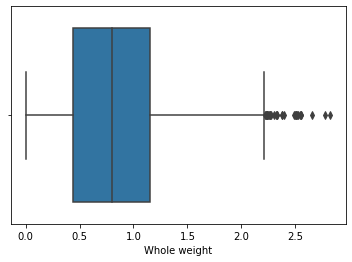

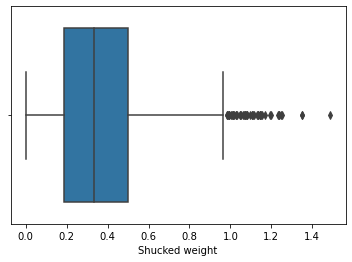

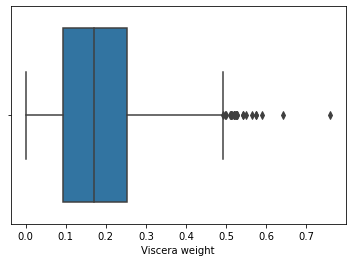

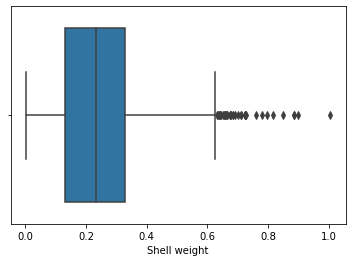

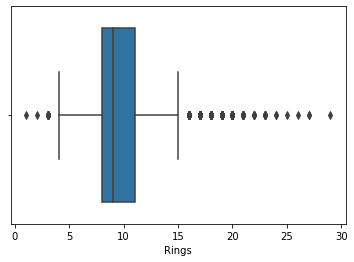

In [22]:
for i in data.columns:
    plt.figure()
    sns.boxplot(data[i])

In [23]:
Y = data.pop('Rings')

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

x_train,x_test,y_train, y_test = train_test_split(data,Y,test_size=.30,random_state=45)

In [24]:
#TO REMOVE SKEWNESS
x_train.skew()

Sex              -0.080656
Length           -0.655605
Diameter         -0.622766
Height            4.063343
Whole weight      0.515000
Shucked weight    0.702454
Viscera weight    0.575359
Shell weight      0.622781
dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestClassifier

from sklearn.neighbors import KNeighborsRegressor

CHECKING TRAINING SCORE OF ALL THe MODELS BY CROSS VALIDATION METHOD

In [27]:
models = [SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in models:
    print(m)
    print('Cross Validation Score:',np.mean(cross_val_score(m,x_train,y_train,scoring='neg_mean_squared_error',cv=10)))

SVR()
Cross Validation Score: -4.686812782141698
KNeighborsRegressor()
Cross Validation Score: -5.214480200102857
DecisionTreeRegressor()
Cross Validation Score: -8.815345504698678
RandomForestRegressor()
Cross Validation Score: -4.651798300177662
AdaBoostRegressor()
Cross Validation Score: -8.522439404931452
GradientBoostingRegressor()
Cross Validation Score: -4.5999209021954055


In [28]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
pred = forest.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
np.sqrt(mean_squared_error(pred,y_test))

2.229570838614892

In [30]:
r2_score(pred,y_test)

0.17655330279686998

TO TUNE the HyperPArameters

In [47]:
grid = RandomizedSearchCV(forest, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1,len(data.columns))
                                    )
         )

In [48]:
grid.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7])})

In [49]:
print(grid.best_params_)

{'max_features': 3, 'max_depth': 11}


After Tuning the hyper parameters of SVM which is used to deal with large no of multi class classification Problems AND ALSO DEALS WITH LARGE NO OF DATASET

In [36]:
svmModel = SVR(kernel='linear', C=1, gamma=.1) 

svmModel.fit(x_train, y_train)

pred = svmModel.predict(x_test)

r2_score(y_test,pred) 

0.486320022228789

In [56]:
params = {'kernel': ['linear','rbf'],
             'C': [.1,1,10,.01], 'gamma': [.1,1,10,.01,.001]
         }
sv = SVR()

In [57]:
g = GridSearchCV(sv,params,cv=5,scoring='r2')

In [59]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 0.01],
                         'gamma': [0.1, 1, 10, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [60]:
g.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
g.best_score_

0.5669028366878104

RandomForest asd other Regressors were giving Accuracy upto 25%, Tuning SVM , as it plots the data into n Dimentional Space, THere can deal with More Complex Datas Tuning SVM, gives upto 54.6% Accuracy

In [62]:
svmModel = SVR(kernel='rbf', C=10, gamma=.1) 

svmModel.fit(x_train, y_train)

pred = svmModel.predict(x_test)

r2_score(y_test,pred) 

0.5480524134425478

In [63]:
np.sqrt(mean_squared_error(pred,y_test))

2.1688735110141426